<a href="https://colab.research.google.com/github/joshuahurd515/ai-and-data-science-work/blob/main/frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

In [ ]:
np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)

In [ ]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
 remaining_red_cards -= card
 remaining_total_cards = 52 - i - 1
 if remaining_red_cards / remaining_total_cards > 0.5:
  break
print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 0.
The next card in the deck is red.
We have won!


In [ ]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None,
 return_index=False):
 if shuffled_deck is None:
  shuffled_deck = np.random.permutation(unshuffled_deck)
  remaining_red_cards = total_red_cards
  for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    fraction_red_cards = remaining_red_cards / (total_cards - i - 1)
    if fraction_red_cards > min_fraction_red:
      break
  return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

observations = np.array([execute_strategy() for _ in range(1000)])


In [ ]:
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.511


In [ ]:
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit:.2f}")


Total profit is $22.00


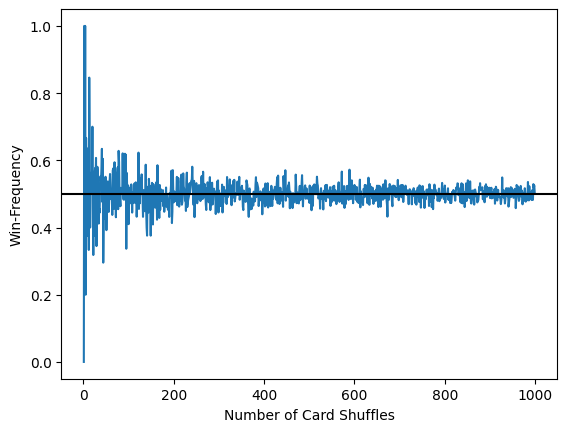

The win-frequency for 10,000 shuffles is 0.5035035035035035


In [ ]:
np.random.seed(0)
def repeat_game(number_repeats):
 observations = np.array([execute_strategy()
 for _ in range(number_repeats)])
 return observations.mean()
frequencies = []
for i in range(1, 1000):
 frequencies.append(repeat_game(i))

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

The frequency range 0.488938 - 0.509494 represents a 97.00% confidence interval


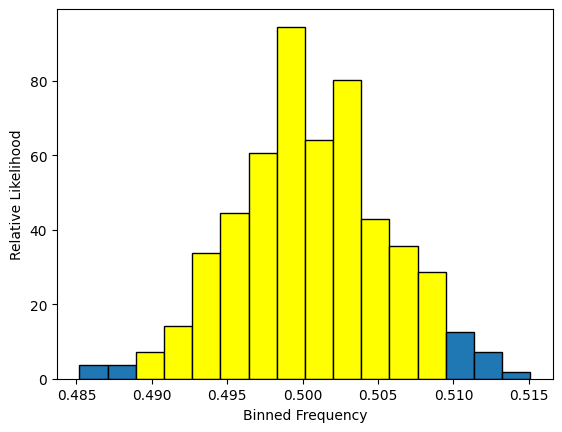

In [ ]:
def compute_high_confidence_interval(likelihoods, bin_width):
 peak_index = likelihoods.argmax()
 area = likelihoods[peak_index] * bin_width
 start_index, end_index = peak_index, peak_index + 1
 while area < 0.95:
  if start_index > 0:
    start_index -= 1
  if end_index < likelihoods.size - 1:
    end_index += 1
  area = likelihoods[start_index: end_index + 1].sum() * bin_width
 range_start, range_end = bin_edges[start_index], bin_edges[end_index]
 range_string = f"{range_start:.6f} - {range_end:.6f}"
 print((f"The frequency range {range_string} represents a "
 f"{100 * area:.2f}% confidence interval"))
 return start_index, end_index

np.random.seed(0)
frequency_array = np.array([repeat_game(10000) for _ in range(300)])
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
 edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]

start_index, end_index = compute_high_confidence_interval(likelihoods,
bin_width)
for i in range(start_index, end_index):
 patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [ ]:
np.random.seed(0)
frequency_array = np.array([repeat_game(500, .75) for _ in range(30)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
 density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.470000 - 0.540000 represents a 96.67% confidence interval


(1, 6)

In [ ]:
np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
 observations = np.array([execute_strategy(min_red_fraction)
 for _ in range(number_repeats)])
 return observations.mean()
frequency_array = np.array([repeat_game(500, 0.75) for _ in range(30)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
 density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.470000 - 0.540000 represents a 96.67% confidence interval


(1, 6)

In [ ]:
np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
 observations = np.array([execute_strategy(min_red_fraction)
 for _ in range(number_repeats)])
 return observations.mean()
frequency_array = np.array([repeat_game(500, 0.75) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
 density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.460923 - 0.547077 represents a 95.67% confidence interval


(9, 30)

In [ ]:
def get_matching_event(event_condition, sample_space):
 return set([outcome for outcome in sample_space
 if event_condition(outcome)])

def compute_event_probability(event_condition, generic_sample_space):
 event = get_matching_event(event_condition, generic_sample_space)
 if type(generic_sample_space) == type(set()):
  return len(event) / len(generic_sample_space)
 event_size = sum(generic_sample_space[outcome]
 for outcome in event)
 return event_size / sum(generic_sample_space.values())


total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.0


In [ ]:
def scan_strategies():
 fractions = [value / 100 for value in range(50, 100)]
 probabilities = []
 for frac in fractions:
  win_condition = lambda x: execute_strategy(frac,
  shuffled_deck=np.array(x))
  probabilities.append(compute_event_probability(win_condition,
  sample_space))
 return probabilities
probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.0
Highest probability of win is 0.0


In [ ]:
for total_cards in [2, 4, 6, 8]:
 total_red_cards = int(total_cards / 2)
 total_black_cards = total_red_cards
 unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
 sample_space = set(itertools.permutations(unshuffled_deck))
 probabilities = scan_strategies()
 if all(prob == 0.5 for prob in probabilities):
  print(f"No winning strategy found for deck of size {total_cards}")
 else:
  print(f"Winning strategy found for deck of size {total_cards}")


Winning strategy found for deck of size 2
Winning strategy found for deck of size 4
Winning strategy found for deck of size 6
Winning strategy found for deck of size 8


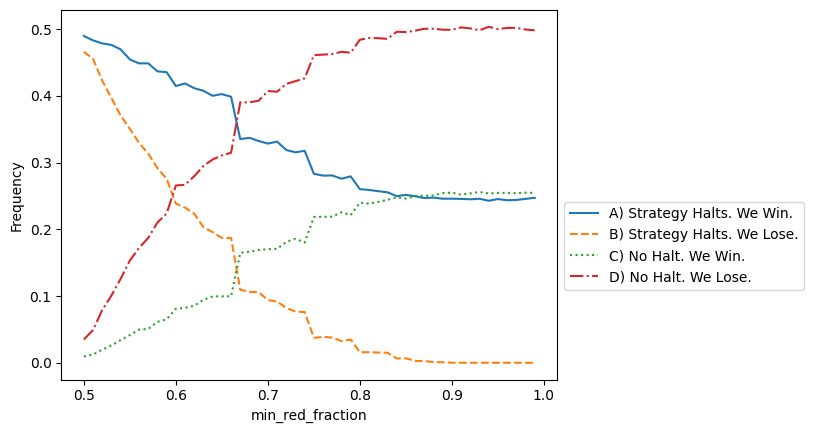

In [ ]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards
def repeat_game_detailed(number_repeats, min_red_fraction):
 observations = [execute_strategy(min_red_fraction, return_index=True)
 for _ in range(num_repeats)]
 successes = [index for index, card, in observations if card == 1]
 halt_success = len([index for index in successes if index != 51])
 no_halt_success = len(successes) - halt_success
 failures = [index for index, card, in observations if card == 0]
 halt_failure = len([index for index in failures if index != 51])
 no_halt_failure = len(failures) - halt_failure
 result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
 return [r / number_repeats for r in result]
fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]
for fraction in fractions:
 result = repeat_game_detailed(num_repeats, fraction)
 for i in range(4):
  result_types[i].append(result[i])
plt.plot(fractions, result_types[0],
 label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--',
 label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':',
 label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.',
 label='D) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

**Summary**

In our quest to devise a winning strategy for predicting red cards in a shuffled deck, we embarked on a journey that led us through various iterations of strategy development and analysis. Initially, we crafted a simple approach based on the ratio of remaining red cards to total remaining cards. This method seemed promising, as it capitalized on the intuitive notion that a higher ratio of red cards would increase our chances of selecting a red card. However, as we delved deeper into our simulations, we discovered the inherent limitations of this strategy.
Despite our efforts to optimize the strategy by adjusting parameters and exploring alternative approaches, such as considering smaller sample spaces, we found that none of our strategies were able to consistently outperform random selection. This realization was humbling, as it underscored the intricate and often counterintuitive nature of probabilities. Despite our best efforts, the randomness inherent in the card game proved to be a formidable opponent, thwarting our attempts to gain a significant advantage.Ultimately, after exhaustive analysis and experimentation, we arrived at a surprising conclusion: the simplest strategy of selecting the first card in the shuffled deck yielded the most optimal results. This revelation served as a powerful reminder of the importance of rigorous testing and empirical validation in the face of complex probabilistic scenarios. Our journey exemplified the delicate balance between intuition and empirical evidence, emphasizing the need for caution and skepticism when navigating uncertain terrain.